In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from utils import *

%matplotlib inline

# Create dataframe

In [2]:
dates = pd.date_range('2009-01-01', '2012-12-31')

In [3]:
symbols = ['SPY']

In [4]:
df = get_data(symbols, dates)

In [5]:
df.head()

,SPY
2009-01-02,79.602650
2009-01-05,79.508455
2009-01-06,80.039370
2009-01-07,77.641697
2009-01-08,77.958535


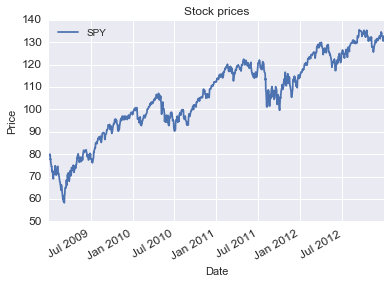

In [6]:
plot_data(df, title = 'Stock prices')

# Compute daily return

In [7]:
daily_returns = compute_daily_return(df)

In [8]:
daily_returns.head()

,SPY
2009-01-02,0.000000
2009-01-05,-0.001183
2009-01-06,0.006677
2009-01-07,-0.029956
2009-01-08,0.004081


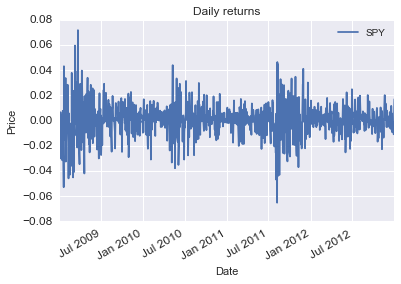

In [9]:
plot_data(daily_returns, title='Daily returns')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1096d20b8>]], dtype=object)

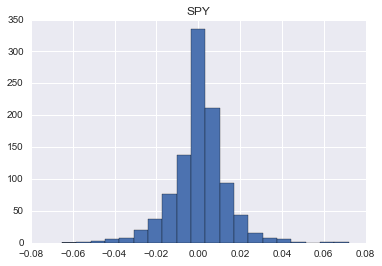

In [10]:
daily_returns.hist(bins=20)

In [11]:
mean = daily_returns['SPY'].mean()

In [12]:
std = daily_returns['SPY'].std()

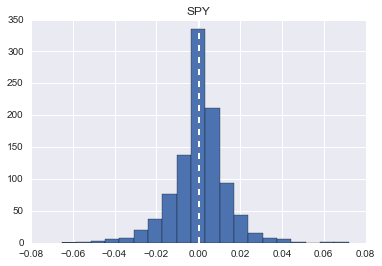

In [13]:
daily_returns.hist(bins=20)
plt.axvline(mean, color='w', linestyle='dashed', linewidth=2)
plt.show()

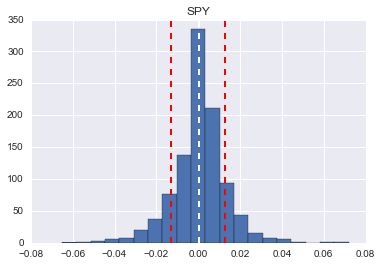

In [14]:
daily_returns.hist(bins=20)
plt.axvline(mean, color='w', linestyle='dashed', linewidth=2)
plt.axvline(std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)
plt.show()

In [15]:
#compute kurtosis
daily_returns.kurtosis()

SPY    3.408585
dtype: float64

# Another dataframe

In [16]:
dates = pd.date_range('2009-01-01', '2012-12-31')
symbols = ['SPY', 'XOM']
df1 = get_data(symbols, dates)

In [17]:
df1.head()

,SPY,XOM
2009-01-02,79.602650,74.48
2009-01-05,79.508455,74.47
2009-01-06,80.039370,73.26
2009-01-07,77.641697,71.39
2009-01-08,77.958535,72.15


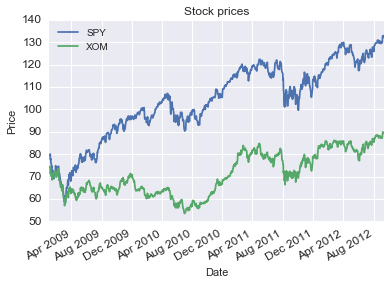

In [18]:
plot_data(df1)

In [19]:
daily_returns_1 = compute_daily_return(df1)

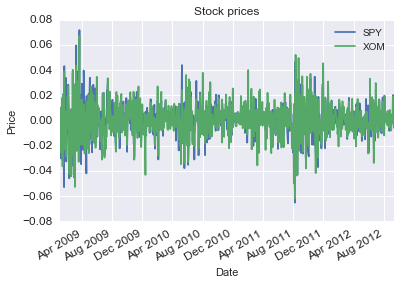

In [20]:
plot_data(daily_returns_1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1098e6c18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10992a0b8>]], dtype=object)

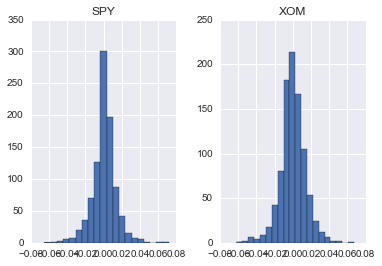

In [21]:
daily_returns_1.hist(bins=20)

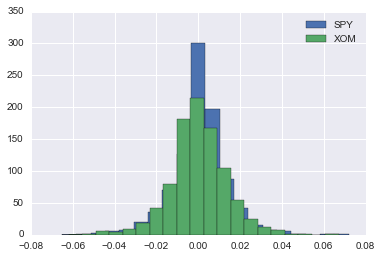

In [22]:
#Plot histograms at same chart
daily_returns_1['SPY'].hist(bins=20, label='SPY')
daily_returns_1['XOM'].hist(bins=20, label='XOM')
plt.legend(loc='upper right')
plt.show()

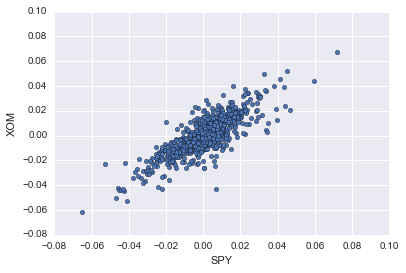

In [23]:
daily_returns_1.plot(kind='scatter', x='SPY', y='XOM')
plt.show()

# One more example

In [24]:
dates = pd.date_range('2009-01-01', '2012-12-31')
symbols = ['SPY', 'XOM', 'GLD']
df2 = get_data(symbols, dates)

In [25]:
df2.head()

,SPY,XOM,GLD
2009-01-02,79.602650,74.48,86.23
2009-01-05,79.508455,74.47,84.48
2009-01-06,80.039370,73.26,85.13
2009-01-07,77.641697,71.39,82.75
2009-01-08,77.958535,72.15,84.46


In [26]:
daily_returns_2 = compute_daily_return(df2)

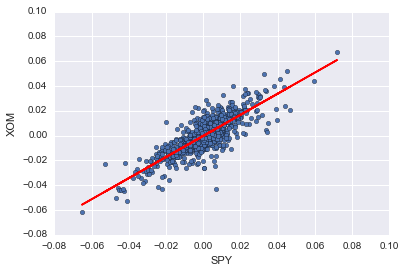

In [27]:
#Scatter plot of SPY and XOM
daily_returns_2.plot(kind='scatter', x='SPY', y='XOM')
beta_xom, alpha_xom = np.polyfit(daily_returns_2['SPY'], daily_returns_2['XOM'], 1)
plt.plot(daily_returns_2['SPY'], beta_xom*daily_returns_2['SPY'] + alpha_xom, '-', color='r')
plt.show()

In [28]:
print("Beta_xom: {0}".format(beta_xom))
print("Alpha_xom: {0}".format(alpha_xom))

Beta_xom: 0.850926364828776
Alpha_xom: -0.00025066166787370475


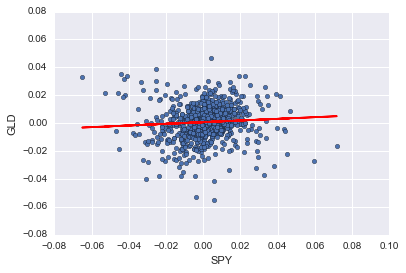

In [29]:
#Scatter plot of SPY and GLD
daily_returns_2.plot(kind='scatter', x='SPY', y='GLD')
beta_gld, alpha_gld = np.polyfit(daily_returns_2['SPY'], daily_returns_2['GLD'], 1)
plt.plot(daily_returns_2['SPY'], beta_gld*daily_returns_2['SPY'] + alpha_gld, '-', color='r')
plt.show()

In [30]:
print("Beta_gld: {0}".format(beta_gld))
print("Alpha_gld: {0}".format(alpha_gld))

Beta_gld: 0.05940395928588926
Alpha_gld: 0.0007478512321469


In [31]:
#Calculate correlation coefficient
daily_returns_2.corr(method='pearson')

,SPY,XOM,GLD
SPY,1.000000,0.820225,0.066906
XOM,0.820225,1.000000,0.069687
GLD,0.066906,0.069687,1.000000
